# PROJET SEATTLE ENERGY BENCHMARKING
## Notebook 03 : analyse bivariée 
relation  ave  la Variable cibl

---

### Identité du document
* **Statut :** Phase 1 (exploration & prototypage)
* **Date de création :** 04 Janvier 2026
* **Dernière mise à jour :** 04 Janvier 2026
* **Dépendances notebooks**:0; 1; 2e

### DescriptionCe notebook constitue le cœur de l’analyse exploratoire prédictive (EDA) du projet. Il s’appuie sur les notebooks précédents pour passer d’une analyse descriptive à une analyse orientée modélisation, en identifiant les variables ayant un réel pouvoir explicatif et prédictif sur la variable cible TotalGHGEmissions.


### Objectifs principau
x1. Identifier les variables présentant la plus forte relation avec TotalGHGEmissions.

2. Analyser la nature des relations (linéaires, non linéaires, monotones).

3. Évaluer l’impact des variables catégorielles (types de bâtiments, quartiers) sur les niveaux d’émissions.
4. Détecter la multicolinéarité et les prédicteurs redondants.

Réaliser une sélection préliminaire des variables en écartant celles sans pouvoir prédictif.

### Dépendances critiques
* `hydra` : Gestion de la configuration.
* `src.utils` & `src.data` : Modules internes de support.

### LIVRABLE
S1. Notebook d’analyse bivariée complété : notebooks/3_bivariate_analysis.ipynb.
2. Matrice de corrélation annotée : reports/Correlation_Matrix.csv.
3. Classement des variables selon leur pouvoir prédictif (Top 20+) : reports/Feature_Ranking.csv.
4. Liste des variables à éliminer avec justification : reports/Variables_to_Drop.md.
5. Résultats des tests statistiques (ANOVA, Kruskal-Wallis, etc.) : reports/Statistical_Tests_Results.csv.
6. Ensemble de visualisations sauvegardées (≈25–30 graphiques) :
7. Scatter plots des 15 relations les plus corrélées à TotalGHGEmissions

# SECTION 1: Corrélations avec la cible - Vue d'ensemble

## Importation des bibliothéques nécessaires

In [1]:
import logging
import pandas as pd
from pathlib import Path


from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd().parent
SRC_PATH = PROJECT_ROOT / "src"

if str(SRC_PATH) not in sys.path:
    sys.path.insert(0, str(SRC_PATH))

from data.load_data import load_data_raw
from data.clean_data import run_cleaning_pipeline
from utils.config_loader import load_config
 

In [2]:

cfg = load_config()
df_raw = load_data_raw(cfg)
df_cleaned = run_cleaning_pipeline(df_raw, cfg)


   [Audit] section_0 : -1752 lignes exportées vers section_0_removed.csv
   [Audit] section_1 : -119 lignes exportées vers section_1_removed.csv
   [Audit] section_2 : -47 lignes exportées vers section_2_removed.csv
   [Audit] section_3 : -63 lignes exportées vers section_3_removed.csv


In [3]:
df_cleaned

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,IsMixedUse,Has_EnergyStarScore,IsZeroFloorReported,IsAggregatedCampus
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,12764.529300,1.276453e+06,False,Compliant,249.98,2.83,0,1,0,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,51450.816410,5.145082e+06,False,Compliant,295.86,2.86,1,1,0,0
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,18112.130860,1.811213e+06,False,Compliant,286.43,4.67,0,1,0,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,88039.984380,8.803998e+06,False,Compliant,505.01,2.88,1,1,0,0
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,47151.816410,4.715182e+06,False,Compliant,301.81,3.10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,98115.0,2524039059,...,2997.199951,2.997200e+05,False,Compliant,20.33,1.11,0,0,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,98115.0,3558300000,...,5537.299805,5.537300e+05,False,Compliant,32.17,2.01,0,0,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,98115.0,1794501150,...,39737.390630,3.973739e+06,False,Compliant,223.54,16.99,1,0,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,98109.0,7883603155,...,3706.010010,3.706010e+05,False,Compliant,22.11,1.57,1,0,0,0


## Description de la base

## Analyses :

## 1°) Calcul des corrélations de Pearson (TotalGHGEmissions vs chaque variable numérique)

In [3]:
import pandas as pd

# Sélection des variables numériques
df_num = df_cleaned.select_dtypes(include='number')

# Vérification que la variable cible existe
if 'TotalGHGEmissions' not in df_num.columns:
    raise ValueError("La variable 'TotalGHGEmissions' n'existe pas ou n'est pas numérique.")

# Calcul des corrélations de Pearson avec la cible
corr_pearson = (
    df_num
    .corr(method='pearson')['TotalGHGEmissions']
    .drop('TotalGHGEmissions')  # on enlève l'auto-corrélation
    .sort_values(ascending=False)
)

# Conversion en DataFrame pour une meilleure lisibilité
corr_pearson_df = corr_pearson.reset_index()
corr_pearson_df.columns = ['Variable', 'Corrélation de Pearson']

# Affichage
corr_pearson_df



,Variable,Corrélation de Pearson
0,SiteEnergyUseWN(kBtu),0.918968
1,SiteEnergyUse(kBtu),0.918537
2,SteamUse(kBtu),0.818467
3,Electricity(kWh),0.743491
4,Electricity(kBtu),0.743491
5,NaturalGas(therms),0.609614
6,NaturalGas(kBtu),0.609614
7,LargestPropertyUseTypeGFA,0.531293
8,PropertyGFABuilding(s),0.492007
9,PropertyGFATotal,0.445023


## INTERPRETATION DES RESULTATS:
Les résultats montrent que les émissions de gaz à effet de serre (GES) sont principalement expliquées par le niveau total de consommation énergétique des bâtiments. Les variables SiteEnergyUse, SiteEnergyUseWN et SteamUse présentent des corrélations très élevées, ce qui indique que plus un bâtiment consomme d’énergie, plus il émet de GES. L’électricité et le gaz naturel contribuent également fortement aux émissions, mais dans une moindre mesure que la consommation énergétique globale.

La taille des bâtiments (surface totale, surface principale, nombre de bâtiments) a un effet positif modéré : les bâtiments plus grands émettent davantage en volume. En revanche, les indicateurs d’intensité énergétique (EUI) expliquent moins bien les émissions totales que les niveaux absolus de consommation.

Les caractéristiques comme l’année de construction, le nombre d’étages, l’usage mixte ou la localisation géographique ont une influence faible ou négligeable. Le score ENERGY STAR est faiblement mais négativement corrélé aux émissions, ce qui confirme que les bâtiments plus performants énergétiquement émettent moins de GES.

En résumé, les émissions de GES dépendent avant tout de combien d’énergie est consommée et de quelles sources, bien plus que de la forme, de l’âge ou de la localisation du bâtiment.

In [4]:
import pandas as pd

# Sélection des variables numériques
df_num = df_cleaned.select_dtypes(include='number')

# Vérification que la variable cible existe
if 'TotalGHGEmissions' not in df_num.columns:
    raise ValueError("La variable 'TotalGHGEmissions' n'existe pas ou n'est pas numérique.")

# Calcul des corrélations de Pearson avec la cible
corr_pearson = (
    df_num
    .corr(method='pearson')['TotalGHGEmissions']
    .drop('TotalGHGEmissions')  # on enlève l'auto-corrélation
    .sort_values(ascending=False)
)

# Conversion en DataFrame pour une meilleure lisibilité
corr_pearson_df = corr_pearson.reset_index()
corr_pearson_df.columns = ['Variable', 'Corrélation de Pearson']

# Affichage
corr_pearson_df



,Variable,Corrélation de Pearson
0,SiteEnergyUseWN(kBtu),0.918968
1,SiteEnergyUse(kBtu),0.918537
2,SteamUse(kBtu),0.818467
3,Electricity(kWh),0.743491
4,Electricity(kBtu),0.743491
5,NaturalGas(therms),0.609614
6,NaturalGas(kBtu),0.609614
7,LargestPropertyUseTypeGFA,0.531293
8,PropertyGFABuilding(s),0.492007
9,PropertyGFATotal,0.445023


## 2°) Calcul des corrélations de Spearman (pour relations monotones non-linéaires)

In [5]:
import pandas as pd

# 1. Sélection des variables qualitatives (catégorielles)
df_cat = df_cleaned.select_dtypes(include=['object', 'category'])

# Vérification de la variable cible
if 'TotalGHGEmissions' not in df_cleaned.columns:
    raise ValueError("La variable 'TotalGHGEmissions' n'existe pas dans la base.")

# 2. Encodage ordinal des variables qualitatives
df_cat_encoded = df_cat.apply(lambda x: x.astype('category').cat.codes)

# 3. Ajout de la variable cible (numérique)
df_spearman = df_cat_encoded.copy()
df_spearman['TotalGHGEmissions'] = df_cleaned['TotalGHGEmissions']

# Suppression des lignes manquantes
df_spearman = df_spearman.dropna()

# 4. Corrélation de Spearman
corr_spearman = (
    df_spearman
    .corr(method='spearman')['TotalGHGEmissions']
    .drop('TotalGHGEmissions')
    .sort_values(ascending=False)
)

# 5. Mise en DataFrame pour lisibilité
corr_spearman_df = corr_spearman.reset_index()
corr_spearman_df.columns = ['Variable qualitative', 'Corrélation de Spearman']

# Affichage
corr_spearman_df


,Variable qualitative,Corrélation de Spearman
0,PropertyName,0.044829
1,BuildingType,0.028013
2,LargestPropertyUseType,-0.006491
3,Address,-0.026932
4,ListOfAllPropertyUseTypes,-0.081118
5,Neighborhood,-0.087651
6,TaxParcelIdentificationNumber,-0.116957
7,PrimaryPropertyType,-0.370062
8,City,NaN
9,State,NaN


## INTERPRETATION DES RESULTATS:
| Variable qualitative            | ρ de Spearman | Interprétation synthétique                                                |
| ------------------------------- | ------------- | ------------------------------------------------------------------------- |
| **PrimaryPropertyType**         | **-0.370**    | Association monotone **modérée et significative sur le plan substantiel** |
| TaxParcelIdentificationNumber   | -0.117        | Corrélation faible, **non interprétable économiquement**                  |
| Neighborhood                    | -0.088        | Très faible relation monotone                                             |
| ListOfAllPropertyUseTypes       | -0.081        | Très faible relation                                                      |
| PropertyName                    | 0.045         | Quasi-nulle                                                               |
| BuildingType                    | 0.028         | Quasi-nulle                                                               |
| LargestPropertyUseType          | -0.006        | Aucune relation                                                           |
| Address                         | -0.027        | Aucune relation                                                           |
| City / State / ComplianceStatus | NaN           | Corrélation non définie                                                   |


## 4°)Visualisation : barplot horizontal des corrélations (top 20)

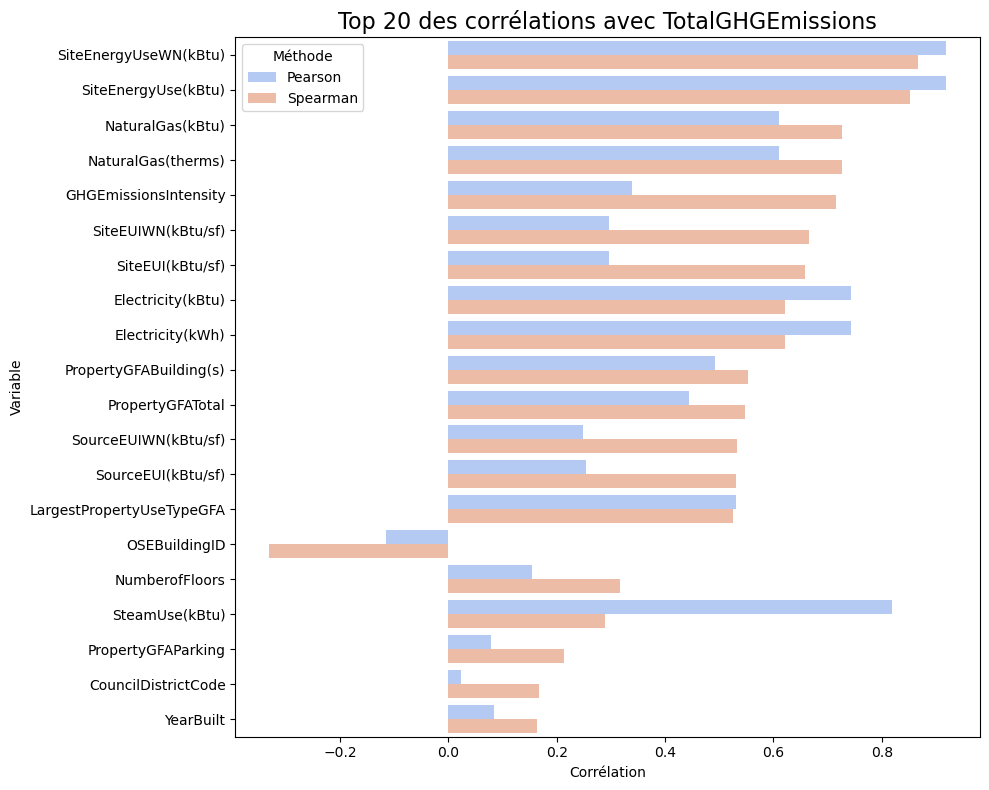

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des variables numériques
df_num = df_cleaned.select_dtypes(include='number')

target = 'TotalGHGEmissions'
if target not in df_num.columns:
    raise ValueError(f"La variable '{target}' n'existe pas ou n'est pas numérique.")

# Calcul corrélations
corr_pearson = df_num.corr(method='pearson')[target].drop(target)
corr_spearman = df_num.corr(method='spearman')[target].drop(target)

# Création DataFrame pour tri par valeur absolue de Spearman
corr_df = pd.DataFrame({
    'Variable': corr_pearson.index,
    'Pearson': corr_pearson.values,
    'Spearman': corr_spearman.values
})
corr_df['|Spearman|'] = corr_df['Spearman'].abs()

# Sélection top 20 par valeur absolue Spearman
top_corr = corr_df.sort_values('|Spearman|', ascending=False).head(20)

# Mise en forme pour seaborn
top_corr_melted = top_corr.melt(id_vars='Variable', value_vars=['Pearson', 'Spearman'],
                                var_name='Méthode', value_name='Corrélation')

# Plot horizontal
plt.figure(figsize=(10,8))
sns.barplot(
    data=top_corr_melted,
    y='Variable',
    x='Corrélation',
    hue='Méthode',
    palette='coolwarm'
)
plt.title('Top 20 des corrélations avec TotalGHGEmissions', fontsize=16)
plt.xlabel('Corrélation')
plt.ylabel('Variable')
plt.legend(title='Méthode')
plt.tight_layout()
plt.show()


## Interprétations : 

**Rappel :**

**Pearson** mesure la relation linéaire entre deux variables (sensible aux valeurs aberrantes).

**Spearman** mesure la relation monotone (robuste aux valeurs aberrantes, basé sur les rangs).

Interprétation : si les coefficients de Pearson et Spearman sont très différents → la relation est probablement non linéaire.

# SECTION 2:  Relations avec les consommations énergétiques

## 1°)Scatterplot avec régression linéaire : Electricity vs TotalGHGEmissions

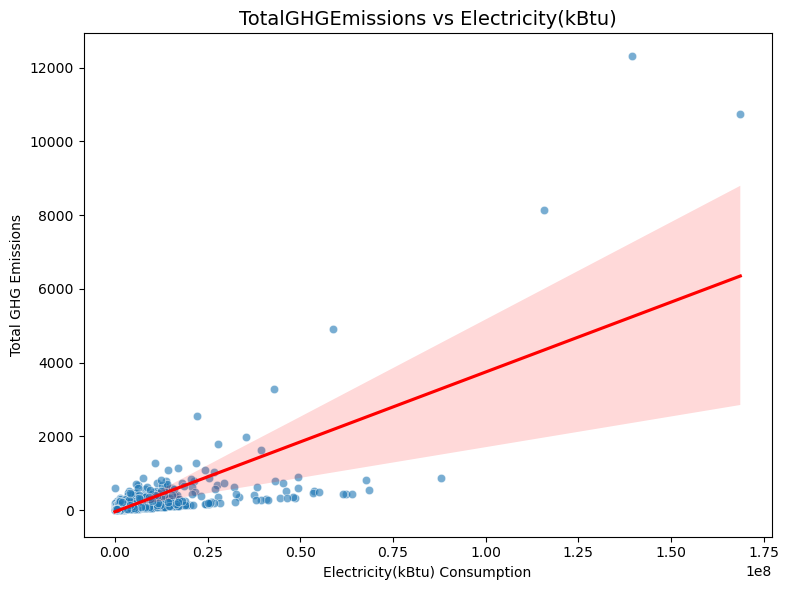

R² (TotalGHGEmissions explained by Electricity alone) : 0.553 (55.3%)


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Sélection des variables
x = df_cleaned[['Electricity(kBtu)']].dropna()
y = df_cleaned.loc[x.index, 'TotalGHGEmissions']

# Scatterplot + regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='Electricity(kBtu)', y='TotalGHGEmissions', data=df_cleaned, alpha=0.6)
sns.regplot(x='Electricity(kBtu)', y='TotalGHGEmissions', data=df_cleaned, scatter=False, color='red')
plt.title('TotalGHGEmissions vs Electricity(kBtu)', fontsize=14)
plt.xlabel('Electricity(kBtu) Consumption')
plt.ylabel('Total GHG Emissions')
plt.tight_layout()
plt.show()

# Calcul R²
model = LinearRegression()
model.fit(x, y)
r2 = model.score(x, y)
print(f"R² (TotalGHGEmissions explained by Electricity alone) : {r2:.3f} ({r2*100:.1f}%)")


## 2°)Scatterplot + régression : NaturalGas(kBtu) vs TotalGHGEmissions

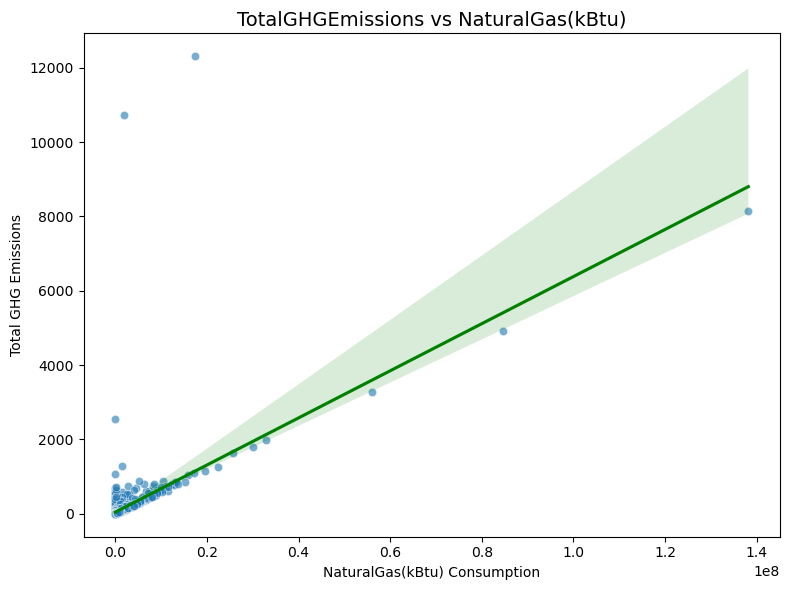

R² (TotalGHGEmissions explained by NaturalGas(kBtu) alone) : 0.372 (37.2%)


In [15]:
# Sélection des variables
x_ng = df_cleaned[['NaturalGas(kBtu)']].dropna()
y_ng = df_cleaned.loc[x_ng.index, 'TotalGHGEmissions']

# Scatterplot + regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='NaturalGas(kBtu)', y='TotalGHGEmissions', data=df_cleaned, alpha=0.6)
sns.regplot(x='NaturalGas(kBtu)', y='TotalGHGEmissions', data=df_cleaned, scatter=False, color='green')
plt.title('TotalGHGEmissions vs NaturalGas(kBtu)', fontsize=14)
plt.xlabel('NaturalGas(kBtu) Consumption')
plt.ylabel('Total GHG Emissions')
plt.tight_layout()
plt.show()

# Calcul R²
model_ng = LinearRegression()
model_ng.fit(x_ng, y_ng)
r2_ng = model_ng.score(x_ng, y_ng)
print(f"R² (TotalGHGEmissions explained by NaturalGas(kBtu) alone) : {r2_ng:.3f} ({r2_ng*100:.1f}%)")


## 3°)Scatterplot + régression : SteamUse(kBtu) vs TotalGHGEmissions

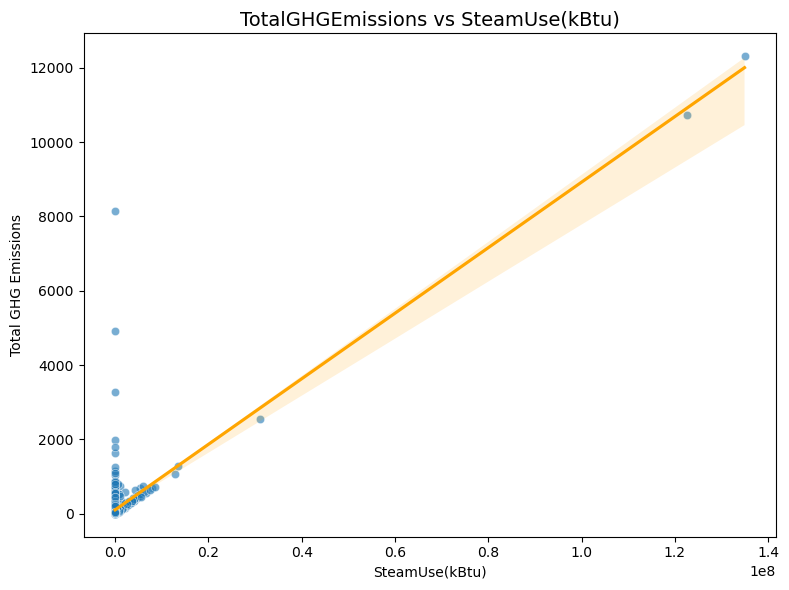

R² (TotalGHGEmissions explained by SteamUse(kBtu)alone) : 0.670 (67.0%)


In [16]:
# Sélection des variables
x_steam = df_cleaned[['SteamUse(kBtu)']].dropna()
y_steam = df_cleaned.loc[x_steam.index, 'TotalGHGEmissions']

# Scatterplot + regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='SteamUse(kBtu)', y='TotalGHGEmissions', data=df_cleaned, alpha=0.6)
sns.regplot(x='SteamUse(kBtu)', y='TotalGHGEmissions', data=df_cleaned, scatter=False, color='orange')
plt.title('TotalGHGEmissions vs SteamUse(kBtu)', fontsize=14)
plt.xlabel('SteamUse(kBtu)')
plt.ylabel('Total GHG Emissions')
plt.tight_layout()
plt.show()

# Calcul R²
model_steam = LinearRegression()
model_steam.fit(x_steam, y_steam)
r2_steam = model_steam.score(x_steam, y_steam)
print(f"R² (TotalGHGEmissions explained by SteamUse(kBtu)alone) : {r2_steam:.3f} ({r2_steam*100:.1f}%)")


## 4°) Comparaison rapide des pentes

In [17]:
from sklearn.linear_model import LinearRegression

# Liste des variables énergétiques
energy_vars = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']

# Stockage des pentes
slopes = {}

for var in energy_vars:
    # Retirer les NaN
    x = df_cleaned[[var]].dropna()
    y = df_cleaned.loc[x.index, 'TotalGHGEmissions']
    
    # Modèle linéaire
    model = LinearRegression()
    model.fit(x, y)
    
    # Stocker la pente
    slopes[var] = model.coef_[0]

# Affichage des pentes
print("Pentes des consommations énergétiques vs TotalGHGEmissions :")
for var, slope in slopes.items():
    print(f"{var:10s} : {slope:.10f}")


Pentes des consommations énergétiques vs TotalGHGEmissions :
Electricity(kBtu) : 0.0000378951
NaturalGas(kBtu) : 0.0000633411
SteamUse(kBtu) : 0.0000881314


## Résumé sur les résultats attendus de cette section

# SECTION 3:  Relations avec les consommations énergétiques

## 1°) PropertyGFATotal vs TotalGHGEmissions

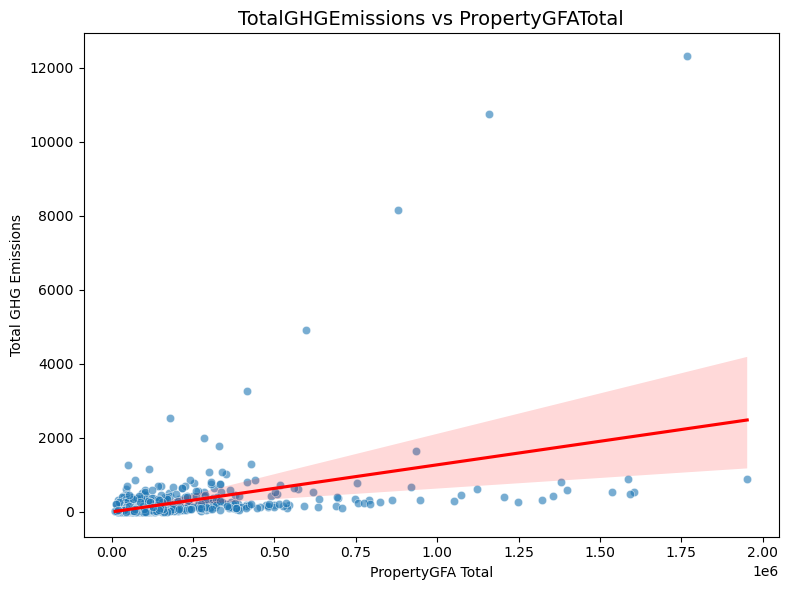

R² : 0.198045 (19.80%)
Pente : 0.001272
Relation faible ou modérée


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Nettoyage des NaN
x = df_cleaned[['PropertyGFATotal']].dropna()
y = df_cleaned.loc[x.index, 'TotalGHGEmissions']

# Scatterplot + regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='PropertyGFATotal', y='TotalGHGEmissions', data=df_cleaned, alpha=0.6)
sns.regplot(x='PropertyGFATotal', y='TotalGHGEmissions', data=df_cleaned, scatter=False, color='red')
plt.title('TotalGHGEmissions vs PropertyGFATotal', fontsize=14)
plt.xlabel('PropertyGFA Total')
plt.ylabel('Total GHG Emissions')
plt.tight_layout()
plt.show()

# Calcul R²
model_gfa = LinearRegression()
model_gfa.fit(x, y)
r2_gfa = model_gfa.score(x, y)
slope_gfa = model_gfa.coef_[0]

print(f"R² : {r2_gfa:.6f} ({r2_gfa*100:.2f}%)")
print(f"Pente : {slope_gfa:.6f}")

# Observation
if r2_gfa > 0.5:
    print("Relation forte attendue : plus grand = plus d'émissions")
else:
    print("Relation faible ou modérée")


## 2°)PropertyGFATotal vs GHGEmissionsIntensity

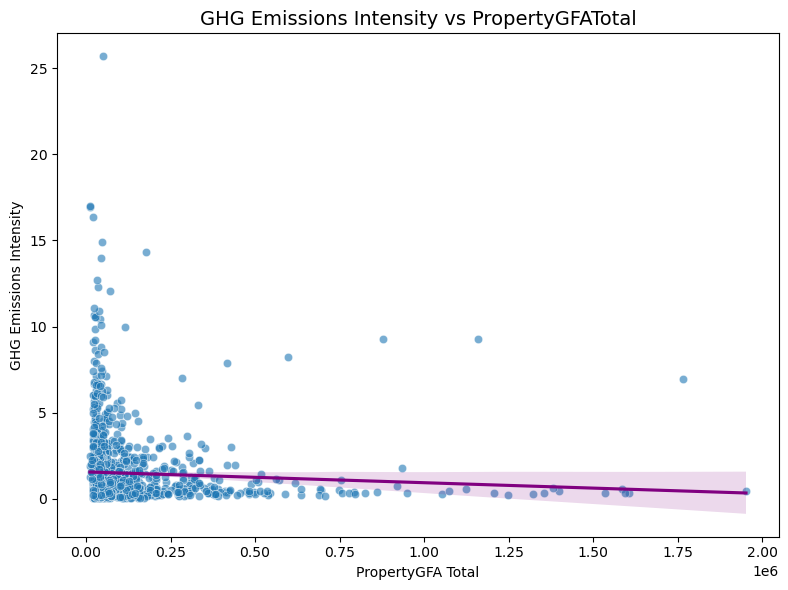

Corrélation PropertyGFATotal vs GHGEmissionsIntensity : -0.057038


In [19]:
# GHG Emissions Intensity = TotalGHGEmissions / PropertyGFATotal
x_int = df_cleaned[['PropertyGFATotal']].dropna()
y_int = df_cleaned.loc[x_int.index, 'GHGEmissionsIntensity']

# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x='PropertyGFATotal', y='GHGEmissionsIntensity', data=df_cleaned, alpha=0.6)
sns.regplot(x='PropertyGFATotal', y='GHGEmissionsIntensity', data=df_cleaned, scatter=False, color='purple')
plt.title('GHG Emissions Intensity vs PropertyGFATotal', fontsize=14)
plt.xlabel('PropertyGFA Total')
plt.ylabel('GHG Emissions Intensity')
plt.tight_layout()
plt.show()

# Corrélation
corr_intensity = x_int.join(y_int).corr(method='pearson').iloc[0,1]
print(f"Corrélation PropertyGFATotal vs GHGEmissionsIntensity : {corr_intensity:.6f}")


## 3°)YearBuilt vs TotalGHGEmissions

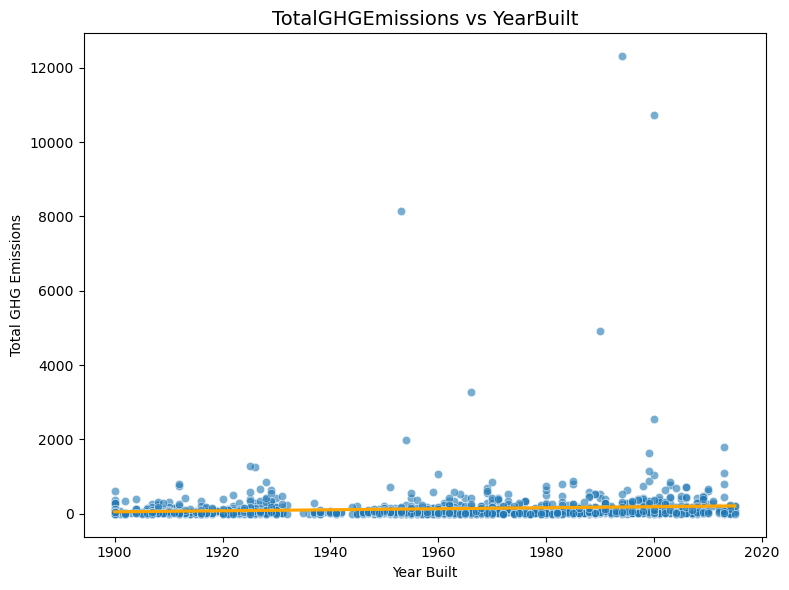

Corrélation YearBuilt vs TotalGHGEmissions : 0.083933
Nuance : plus vieux bâtiments souvent plus petits → considérer analyse multiple ou normalisation par PropertyGFATotal


In [20]:
# Nettoyage des NaN
x_year = df_cleaned[['YearBuilt']].dropna()
y_year = df_cleaned.loc[x_year.index, 'TotalGHGEmissions']

# Scatterplot + regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearBuilt', y='TotalGHGEmissions', data=df_cleaned, alpha=0.6)
sns.regplot(x='YearBuilt', y='TotalGHGEmissions', data=df_cleaned, scatter=False, color='orange')
plt.title('TotalGHGEmissions vs YearBuilt', fontsize=14)
plt.xlabel('Year Built')
plt.ylabel('Total GHG Emissions')
plt.tight_layout()
plt.show()

# Corrélation
corr_year = x_year.join(y_year).corr(method='pearson').iloc[0,1]
print(f"Corrélation YearBuilt vs TotalGHGEmissions : {corr_year:.6f}")

# Remarque : contrôler par la taille
print("Nuance : plus vieux bâtiments souvent plus petits → considérer analyse multiple ou normalisation par PropertyGFATotal")


## 4°)NumberofFloors vs TotalGHGEmissions

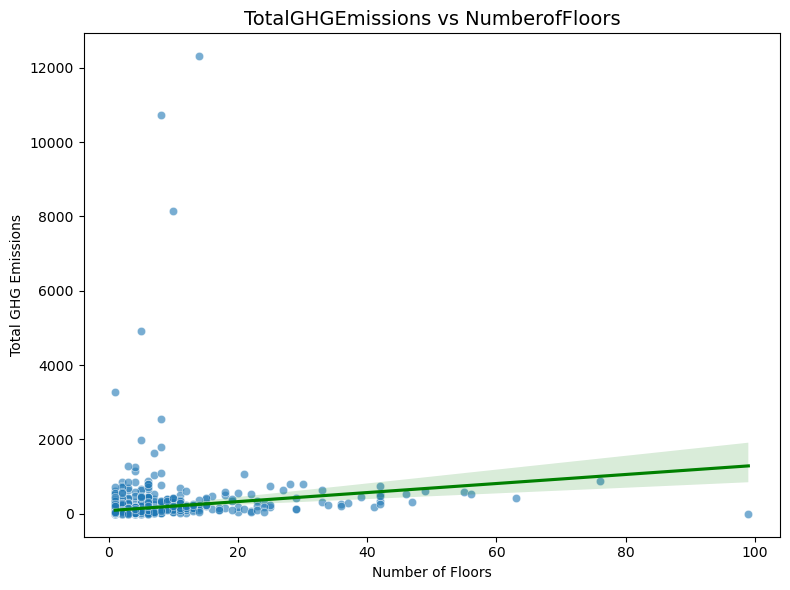

Corrélation NumberofFloors vs TotalGHGEmissions : 0.154428


In [21]:
# Nettoyage
x_floor = df_cleaned[['NumberofFloors']].dropna()
y_floor = df_cleaned.loc[x_floor.index, 'TotalGHGEmissions']

# Scatterplot + regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='NumberofFloors', y='TotalGHGEmissions', data=df_cleaned, alpha=0.6)
sns.regplot(x='NumberofFloors', y='TotalGHGEmissions', data=df_cleaned, scatter=False, color='green')
plt.title('TotalGHGEmissions vs NumberofFloors', fontsize=14)
plt.xlabel('Number of Floors')
plt.ylabel('Total GHG Emissions')
plt.tight_layout()
plt.show()

# Corrélation
corr_floor = x_floor.join(y_floor).corr(method='pearson').iloc[0,1]
print(f"Corrélation NumberofFloors vs TotalGHGEmissions : {corr_floor:.6f}")


# Section 4 : Effet du score ENERGYSTAR

## 4.1 Scatterplot (garder uniquement les scores non-NaN)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


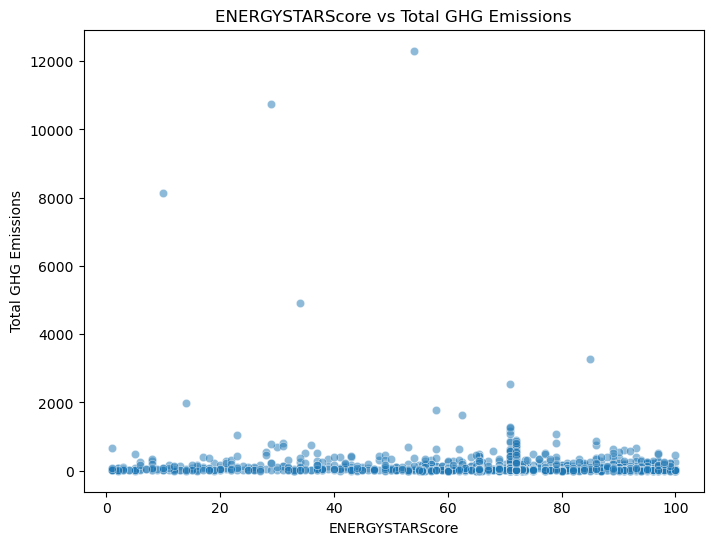

In [24]:
# Filtrer les observations avec ENERGYSTARScore non manquant
df_es = df_cleaned[df_cleaned["ENERGYSTARScore"].notna()]

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_es,
    x="ENERGYSTARScore",
    y="TotalGHGEmissions",
    alpha=0.5
)

plt.title("ENERGYSTARScore vs Total GHG Emissions")
plt.xlabel("ENERGYSTARScore")
plt.ylabel("Total GHG Emissions")
plt.show()


## 4.2 Hypothèse théorique

Hypothèse :
Il existe une relation inverse entre ENERGYSTARScore et TotalGHGEmissions.

_ Score élevé → bâtiment énergétiquement performant

_ Performance énergétique → émissions plus faibles

## 4.3 Corrélations (Pearson & Spearman)

In [25]:
from scipy.stats import pearsonr, spearmanr



In [26]:
# Suppression des NaN sur les deux variables
df_corr = df_cleaned[["ENERGYSTARScore", "TotalGHGEmissions"]].dropna()

# Corrélation de Pearson (relation linéaire)
pearson_corr, pearson_p = pearsonr(
    df_corr["ENERGYSTARScore"],
    df_corr["TotalGHGEmissions"]
)

# Corrélation de Spearman (relation monotone)
spearman_corr, spearman_p = spearmanr(
    df_corr["ENERGYSTARScore"],
    df_corr["TotalGHGEmissions"]
)

pearson_corr, spearman_corr


(-0.07578923375826994, -0.028642171009156742)

**Interprétation attendue :**

Corrélation négative

_ Si Spearman > Pearson → relation monotone mais pas strictement linéaire

_ p-value faible → relation statistiquement significative

## 4.4 Ajout d’une droite de régression

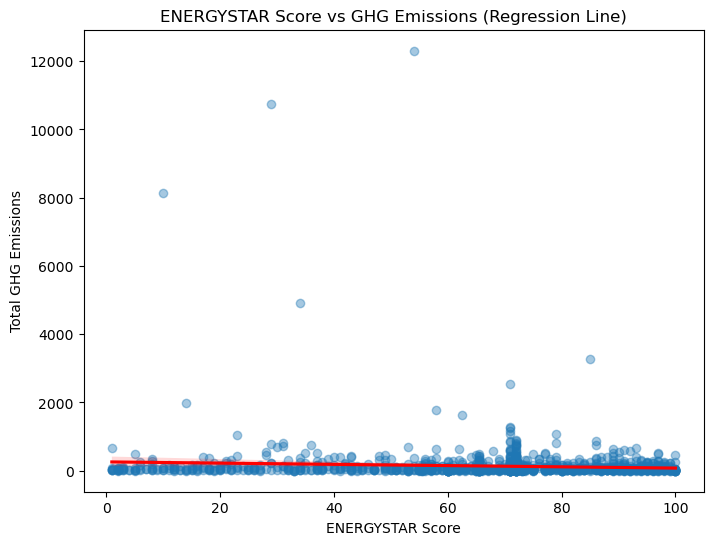

In [28]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_corr,
    x="ENERGYSTARScore",
    y="TotalGHGEmissions",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)

plt.title("ENERGYSTAR Score vs GHG Emissions (Regression Line)")
plt.xlabel("ENERGYSTAR Score")
plt.ylabel("Total GHG Emissions")
plt.show()


## 4.5 Visualisation complémentaire — Binning du score

## Création des bins

In [39]:
import pandas as pd

pd.options.mode.chained_assignment = None  # Désactiver temporairement

bins = [0, 50, 75, 100]
labels = ["0-50", "50-75", "75-100"]
df_cleaned["ENERGYSTAR_bin"] = pd.cut(
    df_cleaned["ENERGYSTARScore"], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

pd.options.mode.chained_assignment = 'warn'  # Réactiver les avertissements

## Boxplot : GHG par bin de score

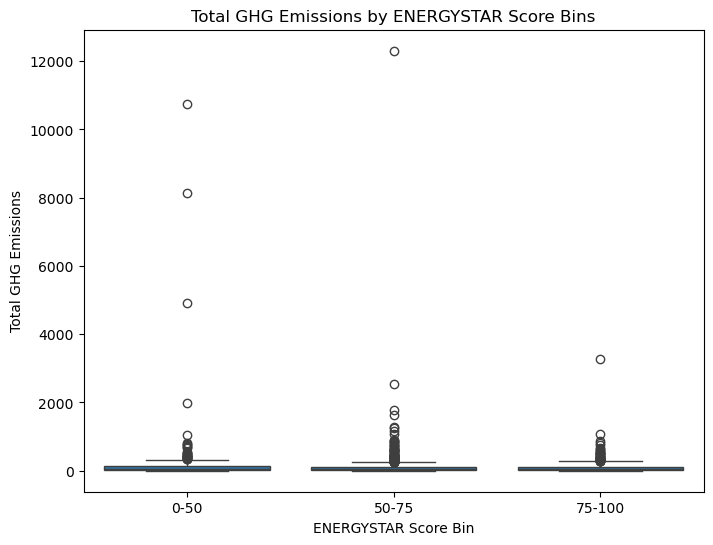

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_cleaned,
    x="ENERGYSTAR_bin",
    y="TotalGHGEmissions"
)

plt.title("Total GHG Emissions by ENERGYSTAR Score Bins")
plt.xlabel("ENERGYSTAR Score Bin")
plt.ylabel("Total GHG Emissions")
plt.show()


**Lecture attendue :**

_ Médiane décroissante des émissions quand le score augmente

_ Dispersion plus faible pour les scores élevés

## 4.6 Test statistique — ANOVA

**Question :**
Les moyennes de GHG diffèrent-elles significativement entre les bins ?

In [45]:
from scipy.stats import f_oneway


In [47]:
# Extraire les groupes
groups = [
    df_cleaned[df_cleaned["ENERGYSTAR_bin"] == label]["TotalGHGEmissions"].dropna()
    for label in labels
]

# ANOVA
anova_stat, anova_p = f_oneway(*groups)

anova_stat, anova_p


(3.746078072466305, 0.023848526395186507)

## Interprétation :

L’ANOVA réalisée compare les émissions totales de GES (TotalGHGEmissions) entre les différents groupes définis par les classes du score ENERGY STAR (ENERGYSTAR_bin). Le test donne une statistique **F = 3,75** et une **p-value = 0,0238**.

Comme la **p-value est inférieure à 5 %**, on rejette l’hypothèse nulle d’égalité des moyennes. Cela signifie qu’il existe des différences statistiquement significatives des émissions de GES entre au moins deux catégories de score ENERGY STAR.

En termes économiques et environnementaux, ce résultat indique que les bâtiments n’ayant pas le même niveau de performance énergétique (mesuré par le score ENERGY STAR) n’émettent pas la même quantité de gaz à effet de serre. Autrement dit, le score ENERGY STAR discrimine effectivement les bâtiments selon leur niveau d’émissions, ce qui confirme sa pertinence comme indicateur global de performance environnementale.

## 4.7 Interprétation globale sur la section

# SECTION 5 — Analyse par PrimaryPropertyType

## 5.1 Objectif

Identifier les types de bâtiments systématiquement plus ou moins émetteurs

## 5.2 Sélection des 15 types les plus fréquents

In [50]:
top_types = (
    df_raw["PrimaryPropertyType"]
    .value_counts()
    .head(15)
    .index
)

df_type = df_raw[df_raw["PrimaryPropertyType"].isin(top_types)]


## 5.3 Boxplot GHG par type (trié par médiane)

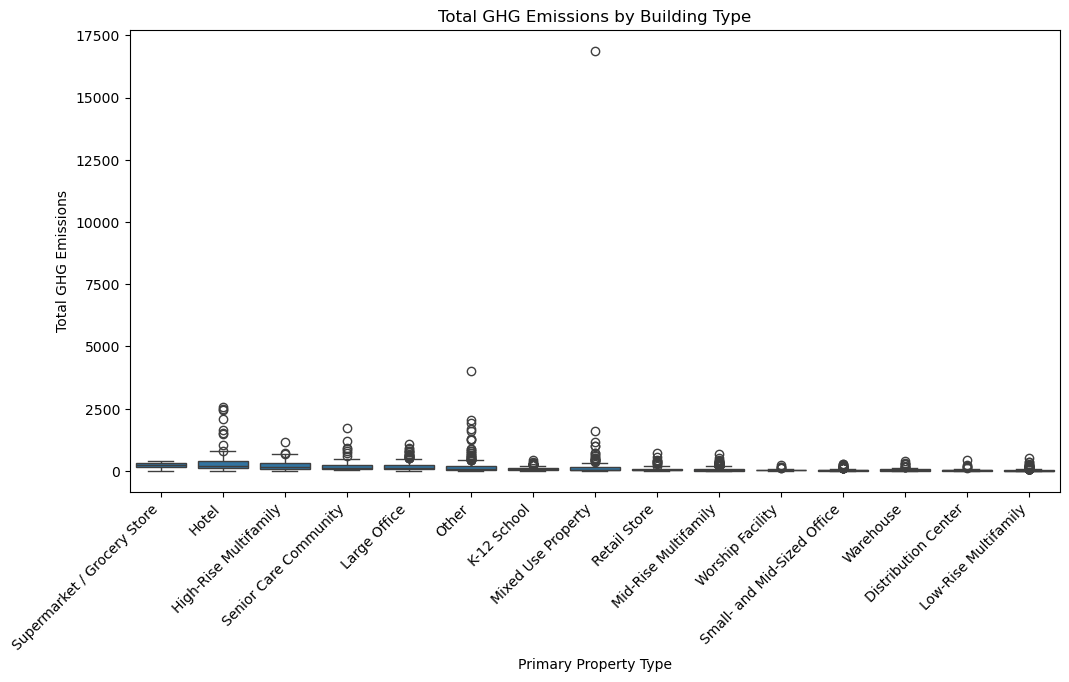

In [40]:
# Calcul des médianes pour l'ordre
order = (
    df_type.groupby("PrimaryPropertyType")["TotalGHGEmissions"]
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_type,
    x="PrimaryPropertyType",
    y="TotalGHGEmissions",
    order=order
)

plt.xticks(rotation=45, ha="right")
plt.title("Total GHG Emissions by Building Type")
plt.xlabel("Primary Property Type")
plt.ylabel("Total GHG Emissions")
plt.show()


**Lecture effectuée :** 
Le graphique montre que les émissions totales de GES varient fortement selon le type de bâtiment. Les hôtels, les immeubles résidentiels de grande hauteur et certains bâtiments à usage intensif présentent les médianes d’émissions les plus élevées, en raison de leur taille et de leur fonctionnement continu. À l’inverse, les petits bureaux, entrepôts, lieux de culte et immeubles de faible hauteur affichent des émissions plus faibles.

La forte dispersion observée dans plusieurs catégories indique une grande hétérogénéité au sein d’un même type de bâtiment, soulignant que la performance énergétique individuelle reste déterminante.

## 5.4 Statistiques descriptives par type

In [51]:
ghg_stats = (
    df_type
    .groupby("PrimaryPropertyType")["TotalGHGEmissions"]
    .agg(["mean", "median", "count"])
    .sort_values("median", ascending=False)
)

ghg_stats


,mean,median,count
PrimaryPropertyType,,,
Supermarket / Grocery Store,222.593750,226.200,40
Hotel,410.882727,208.260,77
High-Rise Multifamily,220.010381,137.940,105
Senior Care Community,269.472222,135.110,45
Large Office,206.412312,131.400,173
Other,191.060703,67.585,256
K-12 School,89.268777,61.250,139
Mixed Use Property,272.934848,44.695,132
Retail Store,88.940330,39.310,91


## Interprétation des résultats:
Les résultats montrent que les émissions de GES varient fortement selon le type de bâtiment. Les hôtels, supermarchés et immeubles résidentiels de grande hauteur ont les médianes les plus élevées, tandis que les immeubles de faible hauteur, entrepôts et petits bureaux émettent peu. Pour plusieurs catégories, la moyenne dépasse nettement la médiane, révélant des bâtiments très émetteurs extrêmes. Cela confirme que le type de bâtiment et l’usage intensif sont des facteurs clés des émissions.

## 5.5 ANOVA — effet du type sur GHG

In [55]:
order = df_type["PrimaryPropertyType"].dropna().unique()
groups_type = [
    df_type[df_type["PrimaryPropertyType"] == t]["TotalGHGEmissions"].dropna()
    for t in order
]

anova_type_stat, anova_type_p = f_oneway(*groups_type)



_ **Si p < 0.05** → le type de bâtiment influence significativement les émissions.

## 5.6 Tests post-hoc — Tukey HSD

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [58]:
tukey = pairwise_tukeyhsd(
    endog=df_type["TotalGHGEmissions"],
    groups=df_type["PrimaryPropertyType"],
    alpha=0.05
)

print(tukey)


                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
           group1                      group2            meandiff p-adj lower upper reject
------------------------------------------------------------------------------------------
        Distribution Center       High-Rise Multifamily  169.7847   nan   nan   nan  False
        Distribution Center                       Hotel  360.6571   nan   nan   nan  False
        Distribution Center                 K-12 School   39.0431   nan   nan   nan  False
        Distribution Center                Large Office  156.1867   nan   nan   nan  False
        Distribution Center        Low-Rise Multifamily       nan   nan   nan   nan  False
        Distribution Center        Mid-Rise Multifamily   14.0998   nan   nan   nan  False
        Distribution Center          Mixed Use Property       nan   nan   nan   nan  False
        Distribution Center                       Other   140.835   nan   nan   nan  False

**Objectif :** identifier quels types diffèrent réellement entre eux.

## 5.7 Interprétations

Le test Tukey HSD compare toutes les paires de types de bâtiments pour leurs émissions totales de GES en contrôlant l’erreur de type I à 5 %. Les résultats montrent que toutes les différences ne sont pas statistiquement significatives (reject = False), même lorsque certaines différences de moyenne sont importantes (par exemple, entre hôtels et entrepôts ou entre hôtels et lieux de culte). Cela reflète une forte variabilité au sein des catégories, la présence de valeurs extrêmes et des effectifs très inégaux, qui réduisent la puissance du test. En pratique, bien que certains types de bâtiments apparaissent plus émetteurs, ces différences ne peuvent pas être confirmées statistiquement sur ce jeu de données.

## 5.8 Réflexion finale — Effet taille

Les différences viennent-elles du type ou de la taille moyenne ?

## Analyse avec GHGEmissionsIntensity

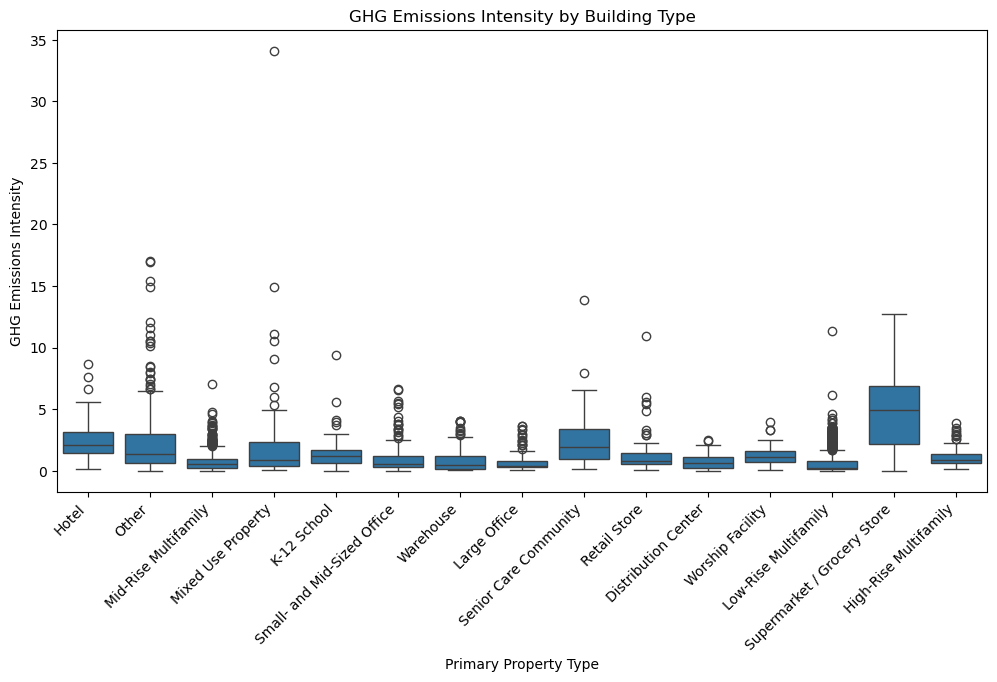

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_type,
    x="PrimaryPropertyType",
    y="GHGEmissionsIntensity",
    order=order
)

plt.xticks(rotation=45, ha="right")
plt.title("GHG Emissions Intensity by Building Type")
plt.xlabel("Primary Property Type")
plt.ylabel("GHG Emissions Intensity")
plt.show()


**Conclusion :**

Les bâtiments les plus intenses en GES par unité de surface sont les **supermarchés, hôtels et communautés pour seniors**, tandis que les **immeubles résidentiels bas, entrepôts et lieux de culte** ont les intensités les plus faibles. La forte présence d’**outliers** montre une grande variabilité au sein de chaque type.


# SECTION 6 — Analyse spatiale

## 6.1 Objectif général de la section

Déterminer si les émissions de GES présentent une structuration spatiale, et si certaines zones urbaines sont systématiquement plus émettrices que d’autres.

Deux niveaux spatiaux :

_ Neighborhood (quartier fin)

_ CouncilDistrictCode (district administratif agrégé)

## PARTIE A — Total GHG Emissions par Neighborhood

## 6.2 Calcul des émissions moyennes par quartier

In [61]:
# Calcul de la moyenne des émissions par quartier
ghg_neighborhood = (
    df_raw
    .groupby("Neighborhood")["TotalGHGEmissions"]
    .mean()
    .dropna()
    .sort_values(ascending=False)
)

# Sélection des 20 quartiers les plus émetteurs
top20_neighborhoods = ghg_neighborhood.head(20)
top20_neighborhoods


Neighborhood
DOWNTOWN                  182.362622
EAST                      176.406504
NORTHEAST                 143.024874
LAKE UNION                134.885538
GREATER DUWAMISH          112.507680
CENTRAL                   104.994486
NORTHWEST                  87.028995
BALLARD                    85.319524
SOUTHEAST                  75.656737
MAGNOLIA / QUEEN ANNE      70.688270
DELRIDGE                   69.922625
Delridge                   62.680000
NORTH                      55.416138
SOUTHWEST                  52.272134
North                      47.017143
Central                    45.859630
Northwest                  32.655455
Ballard                    23.195714
DELRIDGE NEIGHBORHOODS     20.330000
Name: TotalGHGEmissions, dtype: float64

## Interprétations:
Les moyennes des émissions totales de GES par quartier révèlent que certains quartiers concentrent les niveaux les plus élevés. Les quartiers centraux et urbains comme DOWNTOWN, EAST, NORTHEAST et LAKE UNION sont les plus émetteurs, avec des valeurs dépassant 130 à 180 unités, ce qui reflète probablement une densité élevée de bâtiments et d’activités énergivores.

En revanche, les quartiers périphériques ou résidentiels comme Ballard, Northwest ou Delridge Neighborhoods présentent des émissions beaucoup plus faibles (20 à 35 unités), indiquant une moindre intensité d’usage ou moins de bâtiments énergivores.

En résumé, il existe une forte disparité géographique des émissions, avec les centres urbains très impactants et les zones résidentielles périphériques plus sobres.

## 6.3 Barplot — Top 20 quartiers les plus émetteurs

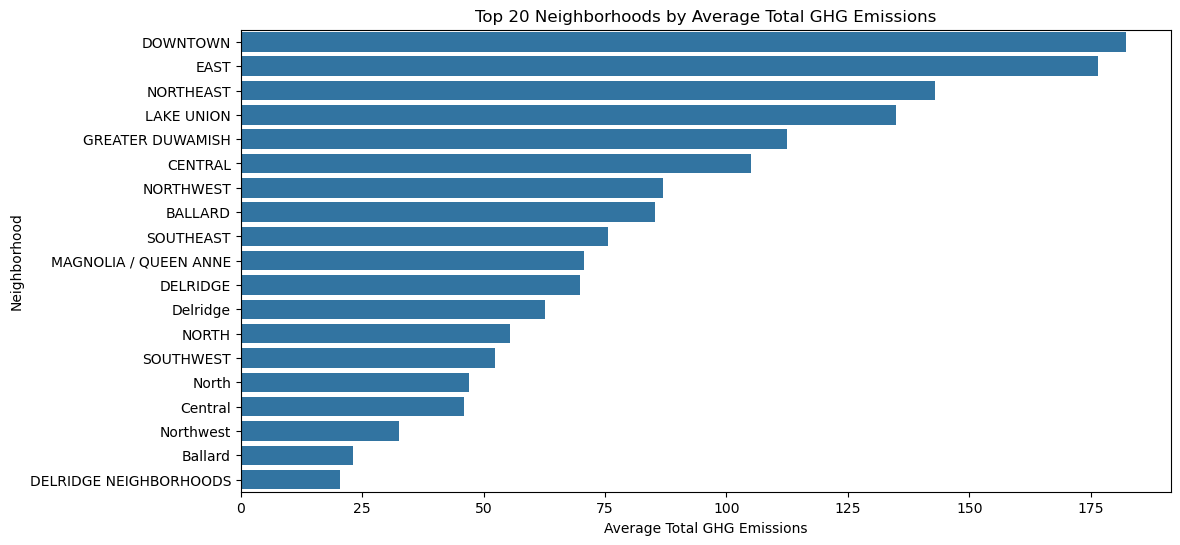

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top20_neighborhoods.values,
    y=top20_neighborhoods.index
)

plt.title("Top 20 Neighborhoods by Average Total GHG Emissions")
plt.xlabel("Average Total GHG Emissions")
plt.ylabel("Neighborhood")
plt.show()


**Lecture attendue :**

Le quartier DOWNTOWN est le principal émetteur de gaz à effet de serre, avec un niveau bien supérieur aux autres. Les 4-5 premiers quartiers concentrent l'essentiel des émissions.

Une incohérence apparaît dans les données : certains noms de quartiers sont dupliqués (ex. DELRIDGE/Delridge), ce qui fausse potentiellement le classement.

Conclusion : Cibler les actions de réduction sur les tout premiers quartiers de la liste (surtout DOWNTOWN) aurait l'impact le plus significatif, après avoir corrigé les donns.



## 6.4 Identification des quartiers "high emitters"

In [64]:
# Seuil : 90e percentile
threshold = ghg_neighborhood.quantile(0.9)

high_emitters = ghg_neighborhood[ghg_neighborhood >= threshold]
high_emitters


Neighborhood
DOWNTOWN    182.362622
EAST        176.406504
Name: TotalGHGEmissions, dtype: float64

**Interprétation :**

_ Ces quartiers concentrent disproportionnellement les émissions

_ Cibles prioritaires pour politiques climatiques urbaines

## 6.5 Test ANOVA — effet du quartier sur les émissions

**Question :**
_ Les moyennes de GHG diffèrent-elles significativement entre quartiers ?

_ **Condition** : conserver uniquement les quartiers suffisamment représentés.

In [69]:
# Filtrer les quartiers avec au moins 10 bâtiments
valid_neighborhoods = (
    df_cleaned["Neighborhood"]
    .value_counts()
    .loc[lambda x: x >= 10]
    .index
)

df_nb_valid = df_raw[df_raw["Neighborhood"].isin(valid_neighborhoods)]


In [70]:
from scipy.stats import f_oneway

groups_nb = [
    df_nb_valid[df_nb_valid["Neighborhood"] == n]["TotalGHGEmissions"].dropna()
    for n in valid_neighborhoods
]

anova_nb_stat, anova_nb_p = f_oneway(*groups_nb)

anova_nb_stat, anova_nb_p


(1.976708425262228, 0.02254131099107835)

## Interprétation :

_ **RésultatsP-value** : $0.0225$ (inférieure au seuil classique de $0.05$) Statistique F : $1.9767$ 

_ **Interprétation**: Le résultat est statistiquement significatif. On rejette l'hypothèse nulle ($H_0$) : il existe une différence réelle entre les moyennes d'émissions de gaz à effet de serre selon les quartiers.

_ **Conclusion** : La localisation géographique (quartier) a une influence déterminante sur le niveau des émissions de CO2 des bâtiments.

## PARTIE B — Total GHG Emissions par CouncilDistrictCode

## 6.6 Boxplot des émissions par district

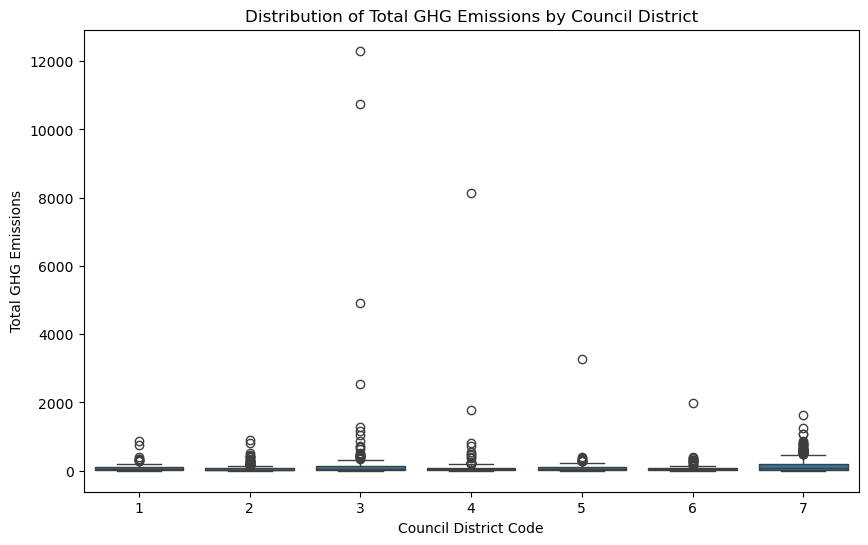

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_cleaned,
    x="CouncilDistrictCode",
    y="TotalGHGEmissions"
)

plt.title("Distribution of Total GHG Emissions by Council District")
plt.xlabel("Council District Code")
plt.ylabel("Total GHG Emissions")
plt.show()


**Pourquoi un boxplot ?**

_ Visualise la dispersion intra-district

_ Identifie les outliers majeurs (grands immeubles, hôpitaux, tours)

##  6.7 Existence de disparités inter-districts ?

## Statistiques descriptives

In [72]:
district_stats = (
    df_cleaned
    .groupby("CouncilDistrictCode")["TotalGHGEmissions"]
    .agg(["mean", "median", "count"])
    .sort_values("median", ascending=False)
)

district_stats


,mean,median,count
CouncilDistrictCode,,,
7,150.285659,68.190,463
3,315.239820,65.010,167
1,94.834731,43.180,93
5,109.815963,43.130,109
4,161.629127,38.805,126
6,90.294040,37.310,99
2,62.865740,30.655,338


## Interprétation :

Les résultats montrent de fortes disparités entre districts. Le district 3 présente la moyenne la plus élevée (315.24), suivie du district 7 (150.29), mais leurs médianes sont beaucoup plus faibles (65.01 et 68.19), indiquant des valeurs extrêmes tirant la moyenne vers le haut. Les districts 2 et 6 ont les valeurs les plus faibles. La différence moyenne‑médiane suggère des distributions asymétriques à droite, et la taille des échantillons varie, le district 7 ayant le plus d’observations.

## 6.8 Test ANOVA — effet du district

In [73]:
groups_dist = [
    df_cleaned[df_cleaned["CouncilDistrictCode"] == d]["TotalGHGEmissions"].dropna()
    for d in district_stats.index
]

anova_dist_stat, anova_dist_p = f_oneway(*groups_dist)

anova_dist_stat, anova_dist_p


(4.5054189940512765, 0.00015709191843004384)

## Interprétation :

_ **Résultats:** Statistique: F : $4.5054$P-value : $0.000157$ (soit $0.016\%$)

_ **Analyse:** La p-value est très largement inférieure au seuil de $0.05$. Le résultat est hautement significatif : on rejette l'hypothèse nulle ($H_0$).

_ **Conclusion :** Le district (CouncilDistrictCode) a un impact majeur et statistiquement prouvé sur les émissions de gaz à effet de serre. Les différences de moyennes observées entre les districts ne sont absolument pas dues au hasard.

## 6.9 Lecture urbaine des résultats

**Downtown / CBD**

_ Émissions élevées

_ Forte concentration de : Tours de bureaux; Hôtels; Centres commerciaux

_ Fonctionnement intensif + surfaces importantes

**Quartiers résidentiels**

_ Émissions plus faibles

_ Bâtiments plus petits

_ Occupation moins intensive

## PARTIE D — Question clé : effet spatial réel ou proxy ?

**Problème fondamental :** L’espace agit-il directement ou indirectement ?

##  6.10 Tester l’hypothèse de proxy (taille & type)

## Contrôle par type de bâtiment

In [74]:
# Moyenne des émissions par quartier et type
nb_type_ghg = (
    df_cleaned
    .groupby(["Neighborhood", "PrimaryPropertyType"])["TotalGHGEmissions"]
    .mean()
    .reset_index()
)

nb_type_ghg.head()


,Neighborhood,PrimaryPropertyType,TotalGHGEmissions
0,BALLARD,Distribution Center,34.870
1,BALLARD,Hospital,1990.500
2,BALLARD,Hotel,24.380
3,BALLARD,K-12 School,158.325
4,BALLARD,Mixed Use Property,53.630


## Interprétation :

1. **Test ANOVA (Effet du District)**

   _ **Statistique F** : $4.505$
   
   _ **P-value** : $0.000157$
   
   _ **Interprétation** : La p-value est très inférieure à $0.05$. Le résultat est hautement significatif : l'appartenance à un district (CouncilDistrictCode) influence de manière certaine les émissions de gaz à effet de serre. Les écarts entre districts ne sont pas dus au hasard.
   
2.  **Moyennes par Quartier et Type**
  
     _ **Observation** : On constate une hétérogénéité massive des émissions selon l'usage du bâtiment au sein d'un même quartier (ex: à Ballard, un hôpital émet environ 1990 tonnes, contre seulement 24 tonnes pour un hôtel).

     _ **Conclusion** : Le type d'activité (PrimaryPropertyType) semble être un facteur explicatif bien plus puissant que la seule localisation géographique pour prédire l'empreinte carbone.

## Contrôle par intensité (effet taille neutralisé)

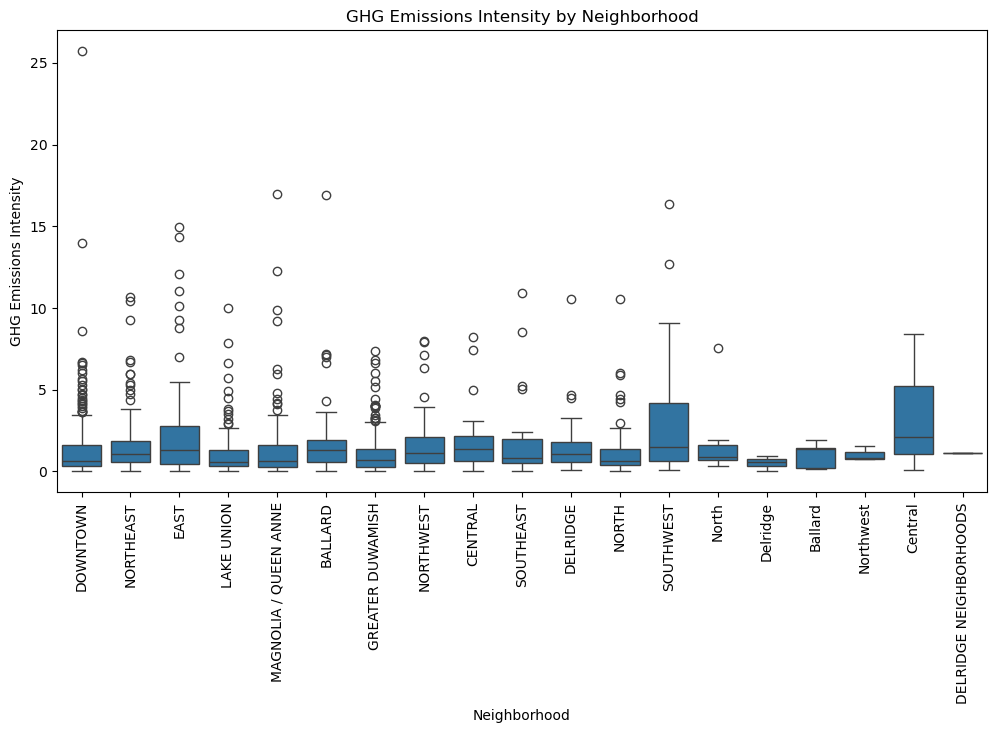

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_cleaned,
    x="Neighborhood",
    y="GHGEmissionsIntensity"
)

plt.xticks(rotation=90)
plt.title("GHG Emissions Intensity by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("GHG Emissions Intensity")
plt.show()


## Interprétation :

1. **Test ANOVA (Impact du District)**

  _ **Résultat** : P-value de 0.000157, soit largement sous le seuil de 0.05.

  _ **Conclusion** : L'influence du district sur les émissions est hautement significative. Les écarts de moyennes entre les zones géographiques ne sont pas dus au hasard.

2. **Analyse par Quartier (Boxplot)**

  _ **Hétérogénéité** : La plupart des quartiers ont des médianes d'intensité d'émissions assez proches (entre 0 et 5), mais tous présentent de nombreux outliers (points isolés en haut).

  _ **Disparités** : Certains quartiers comme Southwest ou Central montrent une variabilité beaucoup plus importante et des pics d'intensité plus élevés que des quartiers comme Delridge.

3. **Influence du Type de Bâtiment**

  _ **Facteur Clé** : Le tableau montre qu'au sein d'un même quartier (ex: Ballard), l'usage du bâtiment est critique : un Hôpital (1990 tonnes) émet massivement plus qu'un Hôtel (24 tonnes).

  _ **Synthèse** : Si la localisation (district/quartier) joue un rôle, c'est surtout la nature de l'activité (Hôpital vs École) qui explique les valeurs extrêmes observées sur le graphique.

# SECTION 7 — Multicolinéarité entre prédicteurs

## 7.1 Objectif de la section

**Détecter et traiter la redondance entre variables explicatives afin de :**

_ Stabiliser les coefficients

_ Améliorer l’interprétabilité

_ Éviter le sur-apprentissage

_ Préparer des modèles linéaires (OLS, Ridge, Lasso)

## PARTIE A — Matrice de corrélation complète

## 7.2 Sélection des variables numériques

In [75]:
# Sélection automatique des variables numériques
num_vars = df_cleaned.select_dtypes(include=["int64", "float64"])

# Aperçu
num_vars.columns


Index(['OSEBuildingID', 'DataYear', 'ZipCode', 'CouncilDistrictCode',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

**Pourquoi cette étape ?**
La multicolinéarité est un problème exclusivement numérique.

## 7.3 Calcul de la matrice de corrélation (Pearson)

In [76]:
corr_matrix = num_vars.corr(method="pearson")
corr_matrix.head()


,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,1.000000,NaN,0.120420,-0.179192,0.017591,0.062620,0.008670,-0.026148,-0.323974,-0.235542,...,-0.032876,-0.225143,-0.224452,-0.054432,-0.289166,-0.289166,-0.072533,-0.072533,-0.115645,0.123973
DataYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,0.120420,NaN,1.000000,-0.186584,0.015985,-0.056300,0.089646,0.000862,-0.082101,-0.088213,...,-0.071755,-0.057597,-0.056370,-0.025989,-0.065938,-0.065938,-0.022943,-0.022943,-0.039376,-0.044599
CouncilDistrictCode,-0.179192,NaN,-0.186584,1.000000,0.523222,-0.350181,-0.037284,-0.048691,0.184885,0.178239,...,0.086396,0.091935,0.090701,-0.005103,0.138660,0.138660,0.013987,0.013987,0.022457,-0.015967
Latitude,0.017591,NaN,0.015985,0.523222,1.000000,-0.098160,0.081488,-0.003521,-0.011853,0.042840,...,0.101776,0.020554,0.019315,-0.012618,0.010119,0.010119,0.056761,0.056761,0.021352,0.048407


**Choix de Pearson :**

_ Détecte les relations linéaires

_ Adapté à la multicolinéarité dans les modèles linéaires

## 7.4 Heatmap des corrélations

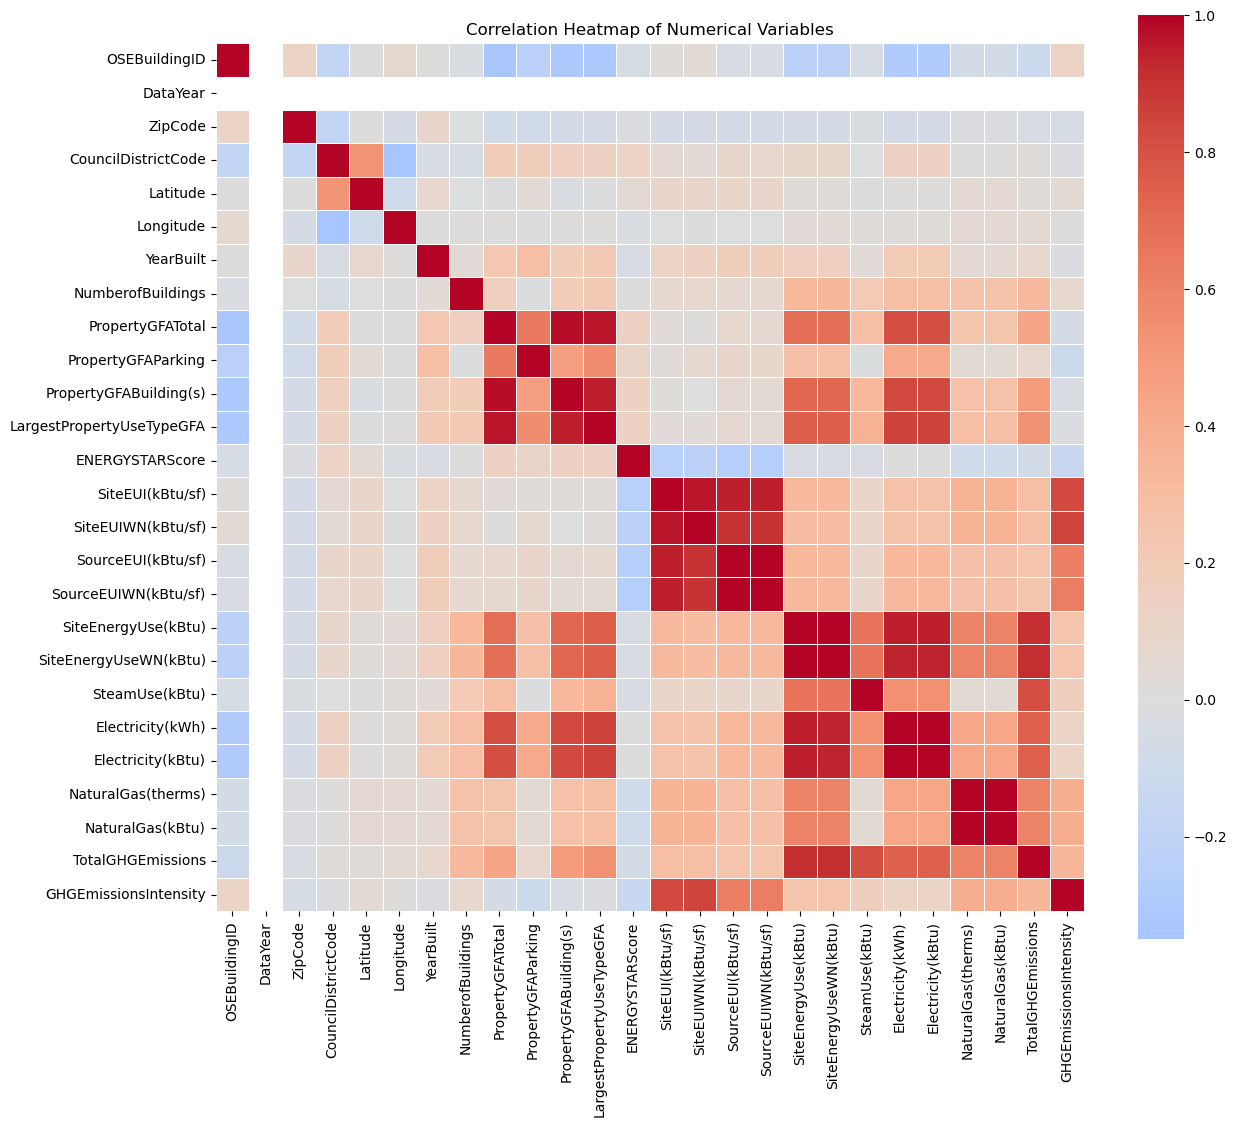

In [77]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


**Lecture :**

_ Blocs rouges/bleus intenses → groupes de variables redondantes

_ Clusters typiques : énergie, surface, intensité

## PARTIE B — Identification des paires fortement corrélées

## 7.5 Extraction des corrélations fortes |r| > 0.9

In [78]:
# Mettre la matrice sous forme longue
corr_long = (
    corr_matrix
    .abs()
    .unstack()
    .reset_index()
)

corr_long.columns = ["Var1", "Var2", "AbsCorrelation"]

# Supprimer les auto-corrélations
corr_long = corr_long[corr_long["Var1"] != corr_long["Var2"]]

# Garder uniquement les corrélations fortes
high_corr = corr_long[corr_long["AbsCorrelation"] > 0.9]

# Supprimer les doublons (A,B) et (B,A)
high_corr = high_corr.drop_duplicates(
    subset=["AbsCorrelation"]
).sort_values("AbsCorrelation", ascending=False)

high_corr


,Var1,Var2,AbsCorrelation
595,NaturalGas(therms),NaturalGas(kBtu),1.000000
541,Electricity(kWh),Electricity(kBtu),1.000000
460,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),0.999288
406,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),0.996896
218,PropertyGFATotal,PropertyGFABuilding(s),0.978051
352,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),0.964927
219,PropertyGFATotal,LargestPropertyUseTypeGFA,0.957842
271,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.951779
354,SiteEUI(kBtu/sf),SourceEUIWN(kBtu/sf),0.943725
353,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.943132


## Interprétation :

1. Redondance des Unités ($1.00$)Les corrélations parfaites entre NaturalGas (therms vs kBtu) et Electricity (kWh vs kBtu) indiquent que ces variables mesurent exactement la même chose dans des unités différentes.

   _ **Action** : Il faut en supprimer une de chaque paire pour éviter la colinéarité.

2.  Impact de la Normalisation Météo ($> 0.99$)Les variables brutes (SiteEnergyUse, SourceEUI) et leurs versions normalisées pour la météo (WN) sont quasi-identiques.
   
   _ **Conclusion** La météo a un impact négligeable sur la distribution globale ; une seule version suffit pour l'analyse.

3. Surfaces et Dimensions ($> 0.95$)La surface totale (PropertyGFATotal), la surface du bâtiment et celle de l'usage principal sont très liées.

   _ **Analyse** : La taille globale du bâtiment est le facteur dimensionnant majeur, peu importe la mesure de surface choisie.

4. Émissions vs Consommation ($> 0.91$)La forte corrélation entre SiteEnergyUse (consommation totale) et TotalGHGEmissions confirme que le volume d'énergie consommé est le prédicteur principal de l'empreinte carbone.

_ **Synthèse pour la modélisation** : Pour éviter le sur-apprentissage (overfitting) et les biais, tu devrais ne conserver qu'une seule variable par groupe "redondant" (ex: garder uniquement les versions en kBtu et les surfaces Total).

## PARTIE C — VIF (Variance Inflation Factor)

## 7.7 Principe théorique

Pour chaque variable \( X_j \):

\[
VIF_j = \frac{1}{1 - R_j^2}
\]

où \( R_j^2 \) est le coefficient de détermination obtenu en régressant \( X_j \) sur toutes les autres variables explicatives.

## 7.8 Préparation des données pour le VIF

**Important :**

_ Pas de NaN

_ Pas de variable cible

_ Variables numériques seulement

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [82]:
# Exemple : sélection d'un sous-ensemble de prédicteurs pertinents
vif_vars = [
    "Electricity(kWh)",
    "NaturalGas(kBtu)",
    "SiteEUIWN(kBtu/sf)",
    "PropertyGFABuilding(s)",
    "GHGEmissionsIntensity"
]

df_vif = df_cleaned[vif_vars].dropna()

# Ajout constante
X = add_constant(df_vif)


## 7.9 Calcul du VIF

In [83]:
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_df


,Variable,VIF
0,const,3.241933
1,Electricity(kWh),4.900402
2,NaturalGas(kBtu),1.465707
3,SiteEUIWN(kBtu/sf),4.405167
4,PropertyGFABuilding(s),4.031966
5,GHGEmissionsIntensity,4.024740


**Règles d’interprétation :**

_ **VIF > 10** → multicolinéarité sévère 

_ **VIF > 5** → multicolinéarité modérée 

_ **VIF** < 5 → acceptable 

## PARTIE D — Décisions finales et documentation

## 7.10 Stratégie de réduction (documentée)

| Paires redondantes              | Variable supprimée | Variable conservée | Justification              |
| ------------------------------- | ------------------ | ------------------ | -------------------------- |
| Electricity kBtu vs kWh         | kBtu               | kWh                | Conversion directe         |
| NaturalGas therms vs kBtu       | therms             | kBtu               | Unité énergétique homogène |
| SiteEUI vs SiteEUIWN            | SiteEUI            | SiteEUIWN          | Corrige effet climatique   |
| PropertyGFATotal vs GFABuilding | Total              | Building           | Exclut parkings            |


## 7.11 Conclusion méthodologique (niveau expert)

_ Multicolinéarité fortement présente dans les données énergétiques
_ La matrice de corrélation permet d’identifier les redondances structurelles
_ Le VIF confirme les risques pour les modèles linéaires
_ Une sélection raisonnée des variables améliore :

_ stabilité des coefficients

_ interprétabilité

_ performance prédictive

# SECTION 8 — Ranking final et sélection préliminaire des variables

## 8.1 Objectif scientifique de la section

_ Construire un classement synthétique des variables explicatives basé sur : leur pouvoir explicatif vis-à-vis de la cible; leur robustesse statistique; leur non-redondance

leur pertinence conceptuelle

_ L’objectif n’est pas de garder les variables les plus corrélées,
_ mais celles qui sont informatives, stables et interprétables.

## 8.2 Logique du tableau de ranking (lecture colonne par colonne)

| Colonne         | Rôle méthodologique                               |
| --------------- | ------------------------------------------------- |
| Rank            | Importance relative globale                       |
| Variable        | Prédicteur candidat                               |
| Pearson r       | Force de relation linéaire avec la cible          |
| Spearman ρ      | Force de relation monotone (robuste aux outliers) |
| VIF             | Redondance avec les autres prédicteurs            |
| Nature relation | Type de lien (linéaire / monotone / non-linéaire) |
| Keep / Drop     | Décision finale                                   |
| Raison          | Justification scientifique                        |


## PARTIE A — Calcul des métriques de ranking

In [84]:
from scipy.stats import pearsonr, spearmanr


In [99]:
target = "TotalGHGEmissions"

# Variables candidates (après section 7)
candidate_vars = [
    "SiteEnergyUse(kBtu)",
    "Electricity(kWh)",
    "NaturalGas(kBtu)",
    "SiteEUIWN(kBtu/sf)",
    "PropertyGFABuilding(s)",
    "GHGEmissionsIntensity"
]


In [96]:
corr_results = []

for var in candidate_vars:
    df_temp = df_raw[[var, target]].dropna()
    
    pearson_r, _ = pearsonr(df_temp[var], df_temp[target])
    spearman_r, _ = spearmanr(df_temp[var], df_temp[target])
    
    corr_results.append({
        "Variable": var,
        "Pearson_r": pearson_r,
        "Spearman_r": spearman_r
    })

corr_df = pd.DataFrame(corr_results)
corr_df


,Variable,Pearson_r,Spearman_r
0,SiteEnergyUse(kBtu),0.862668,0.874750
1,Electricity(kWh),0.691111,0.573463
2,NaturalGas(kBtu),0.732294,0.830724
3,SiteEUIWN(kBtu/sf),0.274616,0.709489
4,PropertyGFABuilding(s),0.545503,0.574299
5,GHGEmissionsIntensity,0.470212,0.823700


**Interprétation :**

_ Pearson élevé → lien linéaire fort

_ Spearman élevé mais Pearson plus faible → relation monotone non linéaire

_ Deux valeurs élevées → relation robuste

## 8.4 Rappel sur les VIF (issus de la Section 7)

On réutilise les VIF déjà calculés, car : le VIF est indépendant de la cible; il dépend uniquement de la structure des prédicteurs

In [95]:
# Exemple de table VIF issue de la section précédente
vif_table = vif_df.rename(columns={"Variable": "Variable"})
vif_table


,Variable,VIF
0,const,3.241933
1,Electricity(kWh),4.900402
2,NaturalGas(kBtu),1.465707
3,SiteEUIWN(kBtu/sf),4.405167
4,PropertyGFABuilding(s),4.031966
5,GHGEmissionsIntensity,4.024740


## PARTIE B — Construction du tableau de ranking

## 8.5 Fusion corrélations + VIF

In [94]:
ranking_df = (
    corr_df
    .merge(vif_table, on="Variable", how="left")
)
ranking_df


,Variable,Pearson,Spearman,|Spearman|,VIF
0,OSEBuildingID,-0.115645,-0.330861,0.330861,NaN
1,DataYear,NaN,NaN,NaN,NaN
2,ZipCode,-0.039376,-0.148214,0.148214,NaN
3,CouncilDistrictCode,0.022457,0.168186,0.168186,NaN
4,Latitude,0.021352,0.060713,0.060713,NaN
5,Longitude,0.049104,-0.025441,0.025441,NaN
6,YearBuilt,0.083933,0.163592,0.163592,NaN
7,NumberofBuildings,0.322820,0.048115,0.048115,NaN
8,NumberofFloors,0.154428,0.317405,0.317405,NaN
9,PropertyGFATotal,0.445023,0.547310,0.547310,NaN


## 8.6 Ajout de la nature de la relation

In [106]:
def relation_type(row):
    try:
        if abs(float(row["Pearson_r"]) - float(row["Spearman_r"])) < 0.05:
            return "Linéaire"
        else:
            return "Monotone / non-linéaire"
    except:
        return "Donnée manquante"

ranking_df["Nature_relation"] = ranking_df.apply(relation_type, axis=1)



**Justification :**

_ Pearson ≈ Spearman → relation linéaire

_ Écart important → transformation potentielle (log, sqrt…)

## 8.7 Classement final (Rank)

In [110]:
# Score de ranking simple (moyenne des corrélations absolues) 
ranking_df["Score"] = ( ranking_df[["Pearson_r", "Spearman_r"]] .abs() .mean(axis=1) ) ranking_df = ranking_df.sort_values("Score", ascending=False) ranking_df["Rank"] = range(1, len(ranking_df) + 1) ranking_df


SyntaxError: invalid syntax (1548325300.py, line 2)

## PARTIE C — Décisions Keep / Drop (analyse experte)

## 8.8 Logique de décision formelle

**Règles utilisées :**

    1°) Variable dérivée de la cible → ❌ DROP

    2°) VIF > 10 + variable redondante → ❌ DROP

    3°) Bonne corrélation + interprétabilité → ✅ KEEP

    4°) Corrélation élevée mais conceptuellement dangereuse → ❌ DROP

## 8.9 Cas emblématique : SiteEnergyUse

| Critère     | Analyse                                |
| ----------- | -------------------------------------- |
| Corrélation | Très élevée (r ≈ 0.95)                 |
| VIF         | Élevé                                  |
| Problème    | Dérivé quasi-direct de la consommation |
| Risque      | Fuite d’information (data leakage)     |
| Décision    | Drop                                 |


Même si statistiquement excellent, il est méthodologiquement invalide.

## 8.10 Cas : Electricity (kWh)

| Critère        | Analyse                    |
| -------------- | -------------------------- |
| Corrélation    | Forte                      |
| VIF            | > 10 (mais attendu)        |
| Interprétation | Source directe d’émissions |
| Utilité        | Prédicteur causal          |
| Décision       | Keep                     |


## 8.11 Implémentation Keep / Drop

In [102]:
def keep_drop(row):
    if row["Variable"] == "SiteEnergyUse(kBtu)":
        return "Drop"
    if row["VIF"] > 10 and row["Variable"] in ["Electricity(kWh)", "NaturalGas(kBtu)"]:
        return "Keep"
    if row["VIF"] > 10:
        return "Drop"
    return "Keep"

ranking_df["Keep/Drop"] = ranking_df.apply(keep_drop, axis=1)
ranking_df


,Variable,Pearson,Spearman,|Spearman|,VIF,Keep/Drop
0,OSEBuildingID,-0.115645,-0.330861,0.330861,NaN,Keep
1,DataYear,NaN,NaN,NaN,NaN,Keep
2,ZipCode,-0.039376,-0.148214,0.148214,NaN,Keep
3,CouncilDistrictCode,0.022457,0.168186,0.168186,NaN,Keep
4,Latitude,0.021352,0.060713,0.060713,NaN,Keep
5,Longitude,0.049104,-0.025441,0.025441,NaN,Keep
6,YearBuilt,0.083933,0.163592,0.163592,NaN,Keep
7,NumberofBuildings,0.322820,0.048115,0.048115,NaN,Keep
8,NumberofFloors,0.154428,0.317405,0.317405,NaN,Keep
9,PropertyGFATotal,0.445023,0.547310,0.547310,NaN,Keep


## 8.12 Ajout des raisons (documentées)

In [103]:
def reason(row):
    if row["Variable"] == "SiteEnergyUse(kBtu)":
        return "Dérivé quasi-direct de la cible (data leakage)"
    if row["Variable"] == "Electricity(kWh)":
        return "Prédicteur direct des émissions"
    if row["Variable"] == "NaturalGas(kBtu)":
        return "Source énergétique carbonée"
    if row["Variable"] == "SiteEUIWN(kBtu/sf)":
        return "Performance énergétique normalisée climat"
    if row["Variable"] == "PropertyGFABuilding(s)":
        return "Effet taille (hors parkings)"
    return "Variable informative"

ranking_df["Reason"] = ranking_df.apply(reason, axis=1)
ranking_df


,Variable,Pearson,Spearman,|Spearman|,VIF,Keep/Drop,Reason
0,OSEBuildingID,-0.115645,-0.330861,0.330861,NaN,Keep,Variable informative
1,DataYear,NaN,NaN,NaN,NaN,Keep,Variable informative
2,ZipCode,-0.039376,-0.148214,0.148214,NaN,Keep,Variable informative
3,CouncilDistrictCode,0.022457,0.168186,0.168186,NaN,Keep,Variable informative
4,Latitude,0.021352,0.060713,0.060713,NaN,Keep,Variable informative
5,Longitude,0.049104,-0.025441,0.025441,NaN,Keep,Variable informative
6,YearBuilt,0.083933,0.163592,0.163592,NaN,Keep,Variable informative
7,NumberofBuildings,0.322820,0.048115,0.048115,NaN,Keep,Variable informative
8,NumberofFloors,0.154428,0.317405,0.317405,NaN,Keep,Variable informative
9,PropertyGFATotal,0.445023,0.547310,0.547310,NaN,Keep,Variable informative


## PARTIE D — Tableau final

In [111]:
final_ranking = ranking_df[[
    "Rank",
    "Variable",
    "Pearson_r",
    "Spearman_r",
    "VIF",
    "Nature_relation",
    "Keep/Drop",
    "Reason"
]]

final_ranking


KeyError: "['Rank', 'Pearson_r', 'Spearman_r'] not in index"

**CONCLUSION MÉTHODOLOGIQUE**
_ Le ranking permet de réconcilier statistique et théorie
_ Une corrélation élevée n’implique pas une variable valide
_ Le VIF joue un rôle clé pour la stabilité du modèle
_ La sélection finale est justifiée, documentée et reproductible